# Test of classifcation Moses + Fastai pre/post processing

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

In [2]:
from fastai import *
from fastai.text import *

In [3]:
from ulmfit.train_clas import *

In [4]:
exp = CLSHyperParams('data/imdb', qrnn=False,tokenizer='vf', lang='en', cuda_id=1)

Batch size: 70
Max vocab: 60000
Cache dir: data/imdb/models/vf60k
Model dir: data/imdb/models/vf60k/lstm_None.m


In [5]:
exp.pretrained_model = URLs.WT103_1
exp.drop_mult=0.3

In [6]:
exp.load_cls_data??

In [7]:
data_clas, data_lm = exp.load_cls_data(bs=40,force=True, use_test_for_validation=True)

Saving tokenized: cls.trn 25000, cls.val 25000
Size of vocabulary: 60002
First 20 words in vocab: ['xxunk', 'xxpad', 'xxmaj', 'the', ',', '.', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this', 'that', '"', "'s", 'was', 'as']


In [8]:
learn = exp.create_lm_learner(data_lm)

Training args:  {'drop_mult': 0.3, 'tie_weights': True, 'clip': 0.12, 'bptt': 70, 'pretrained_fnames': None, 'pretrained_model': 'https://s3.amazonaws.com/fast-ai-modelzoo/wt103-1'} dps:  None


In [9]:
learn.true_wd=True
learn.opt=None
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


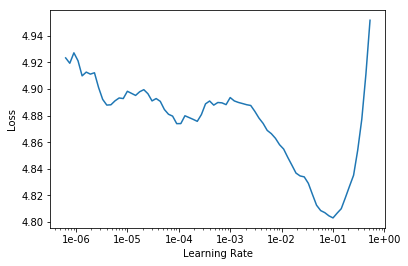

In [10]:
learn.recorder.plot(skip_end=15)

In [11]:
learn.fit_one_cycle(1, 1e-02, moms=(0.8,0.7))

Total time: 23:37
epoch  train_loss  valid_loss  accuracy
1      4.225404    4.029806    0.302210  (23:37)



In [12]:
learn.save('fit_head')

In [13]:
learn.load('fit_head');

In [14]:
learn.unfreeze()
learn.fit_one_cycle(20, 1e-3, moms=(0.8,0.7))

Total time: 8:58:03
epoch  train_loss  valid_loss  accuracy
1      3.970405    3.867857    0.316788  (26:53)
2      3.920167    3.786381    0.327380  (26:54)
3      3.851934    3.726164    0.336203  (26:53)
4      3.814150    3.671940    0.343449  (26:54)
5      3.798842    3.626528    0.348548  (26:53)
6      3.753443    3.585267    0.353221  (26:57)
7      3.723497    3.546739    0.357538  (26:55)
8      3.676399    3.515404    0.361083  (26:53)
9      3.668247    3.487297    0.364337  (26:52)
10     3.633528    3.454587    0.368336  (26:51)
11     3.611737    3.425386    0.372090  (26:49)
12     3.586109    3.396924    0.375549  (26:54)
13     3.568666    3.371741    0.379174  (26:53)
14     3.536366    3.337895    0.383549  (26:59)
15     3.507154    3.313276    0.387211  (26:56)
16     3.465269    3.290863    0.390346  (26:56)
17     3.479237    3.274435    0.392694  (26:54)
18     3.407071    3.261680    0.394350  (26:55)
19     3.425704    3.255773    0.395224  (26:52)
20     3.

In [15]:
learn.save("afteroom")

In [ ]:
learn.load("afteroom");

In [16]:
learn.validate()

[3.2538004, tensor(0.3954)]

In [17]:
learn.save_encoder("enc_best")
learn.save("lm_best", with_opt=False)

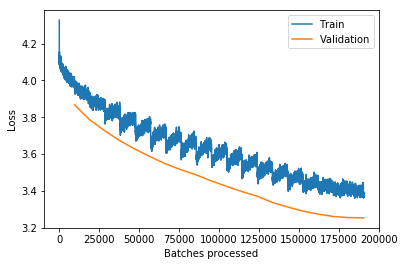

In [18]:
learn.recorder.plot_losses()

# Classification

In [19]:
exp.drop_mult=0.5
learn=exp.create_cls_learner(data_clas)

In [20]:
learn.true_wd=True

In [21]:
learn.load_encoder('enc_best')
learn.freeze()

In [22]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

Total time: 03:53
epoch  train_loss  valid_loss  accuracy
1      0.264060    0.178016    0.934240  (03:53)



In [23]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

Total time: 04:21
epoch  train_loss  valid_loss  accuracy
1      0.261168    0.164097    0.940720  (04:21)



In [24]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

Total time: 05:39
epoch  train_loss  valid_loss  accuracy
1      0.222833    0.151485    0.944720  (05:39)



In [25]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

Total time: 13:48
epoch  train_loss  valid_loss  accuracy
1      0.210751    0.151522    0.948720  (06:54)
2      0.181168    0.161364    0.948640  (06:53)



In [26]:
learn.save('best_cls')

In [36]:
learn.load("best_cls");